## BTC Price Trend

---

###### Import required modules:

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

---

###### Read data from the csv file and store it in the pandas dataframe:

In [2]:
df = pd.read_csv("BTC-Data.csv")
df

Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2705  2022-02-12  42412.300781  42992.550781  41852.574219  42244.468750   
2706  2022-02-13  42236.566406  42693.054688  41950.941406  42197.515625   
2707  2022-02-14  42157.398438  42775.777344  41681.957031  42586.917969   
2708  2022-02-15  42586.464844  44667.218750  42491.035156  44575.203125   
2709  2022-02-16  44503.093750  44503.093750  43475.257813  43734.277344   

         Adj Close       Volume  
0       457.334015     21056800  
1       424.440002     34483200  
2       394.795990     37919700  
3       408.903992     36863600  
4       398.821014     26580100  
...            ...          ...  
2705  42244.468750  18152390304  
2706  42197.515625  14741589015  
2707  42586.917969  20827783012  
2708  44575.203125  22721659051  
2709  43734.277344  18829363200  

[2710 rows x 7 columns]

---

###### Get information about this dataset:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2710 entries, 0 to 2709
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2710 non-null   object 
 1   Open       2710 non-null   float64
 2   High       2710 non-null   float64
 3   Low        2710 non-null   float64
 4   Close      2710 non-null   float64
 5   Adj Close  2710 non-null   float64
 6   Volume     2710 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.7+ KB


---

###### See the data description:

In [4]:
df.describe()

Open          High           Low         Close     Adj Close  \
count   2710.000000   2710.000000   2710.000000   2710.000000   2710.000000   
mean   11277.589631  11580.882719  10943.469218  11291.829303  11291.829303   
std    16083.796680  16515.902012  15587.365311  16090.348144  16090.348144   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%      606.311508    609.106491    602.708999    606.622269    606.622269   
50%     6298.260009   6433.530029   6210.280029   6308.524902   6308.524902   
75%    10413.987061  10731.323486  10197.124023  10433.489014  10433.489014   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  2.710000e+03  
mean   1.469404e+10  
std    2.002482e+10  
min    5.914570e+06  
25%    7.972330e+07  
50%    5.084691e+09  
75%    2.456302e+10  
max    3.509679e+11

---

###### Display the correlation between features:

In [5]:
df.corr()

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999535  0.999104  0.998844   0.998844  0.729051
High       0.999535  1.000000  0.999047  0.999492   0.999492  0.732609
Low        0.999104  0.999047  1.000000  0.999399   0.999399  0.721405
Close      0.998844  0.999492  0.999399  1.000000   1.000000  0.727886
Adj Close  0.998844  0.999492  0.999399  1.000000   1.000000  0.727886
Volume     0.729051  0.732609  0.721405  0.727886   0.727886  1.000000

---

###### Checking number of unique rows in each feature:

In [6]:
df.nunique()

Date         2710
Open         2706
High         2707
Low          2709
Close        2707
Adj Close    2707
Volume       2710
dtype: int64

---

###### Remove Adj Close feature because its values are similar to Close feature and also add average price per day to features:

In [7]:
df = df.drop(labels=["Adj Close"], axis=1)
df.insert(loc=5, column="Average", value=(df["Open"]+df["High"]+df["Low"]+df["Close"])/4)
df.head()

Date        Open        High         Low       Close     Average  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  460.948509   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  437.815994   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  407.816498   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  404.188996   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  403.128250   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100

---

###### Now we convert Date feature values to numerical values (ith day):

In [8]:
df["Date"] = [ith+1 for ith in range(2710)]
df.head()

Date        Open        High         Low       Close     Average    Volume
0     1  465.864014  468.174011  452.421997  457.334015  460.948509  21056800
1     2  456.859985  456.859985  413.104004  424.440002  437.815994  34483200
2     3  424.102997  427.834991  384.532013  394.795990  407.816498  37919700
3     4  394.673004  423.295990  389.882996  408.903992  404.188996  36863600
4     5  408.084991  412.425995  393.181000  398.821014  403.128250  26580100

---

###### We can also get comprehensive information and related diagrams in a frame:

In [9]:
pandas_profiling.ProfileReport(df)

Render HTML: 100%|██████████| 1/1 [00:04<00:00,  4.57s/it]


---

###### Set X & y and display their scatter on the diagram:

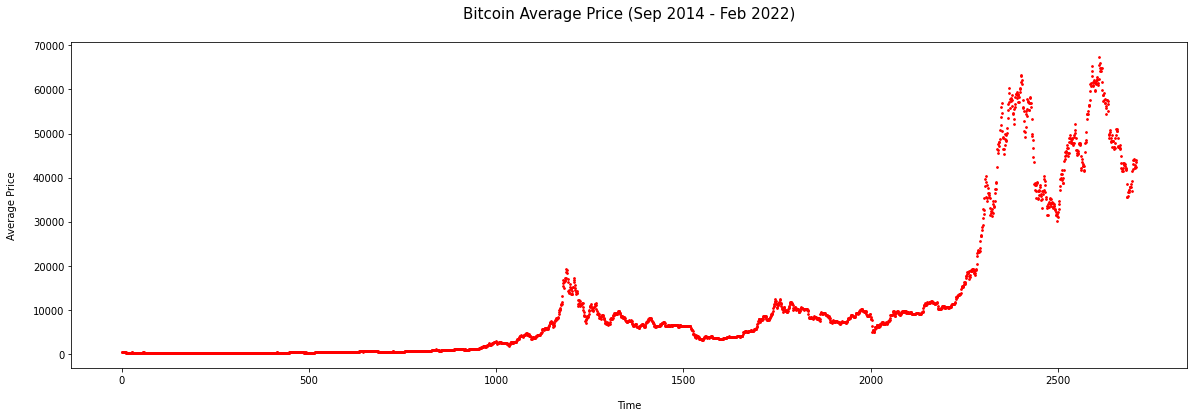

In [10]:
X = df["Date"]
y = df["Average"]
plt.figure(figsize=(20, 6))
plt.scatter(X, y, color="red", s=3)
plt.title("Bitcoin Average Price (Sep 2014 - Feb 2022)\n", fontsize=15)
plt.xlabel("\nTime")
plt.ylabel("Average Price\n")
plt.show()

---

###### Split X & y to train and test and create model and evaluate that (display model accuracy):

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = np.poly1d(np.polyfit(X_train, y_train, deg=2))
modelAccuracy = r2_score(y_test, model(X_test))
print(f"{int(round(modelAccuracy, 2)*100)}%")

77%


---

###### Display the related diagram with the line of polynomial regression:

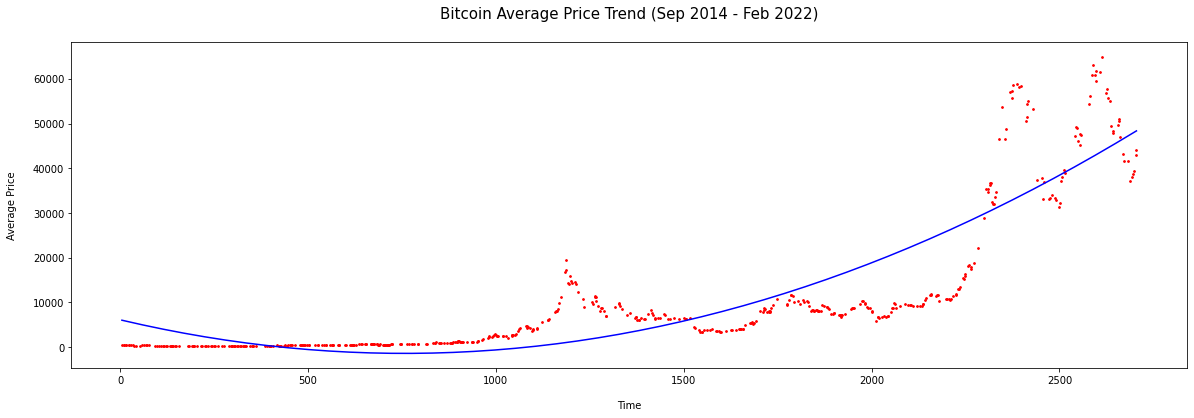

In [12]:
line = np.linspace(start=X_test.min(), stop=X_test.max())
plt.figure(figsize=(20, 6))
plt.scatter(X_test, y_test, color="red", s=3)
plt.plot(line, model(line), color="blue")
plt.title("Bitcoin Average Price Trend (Sep 2014 - Feb 2022)\n", fontsize=15)
plt.xlabel("\nTime")
plt.ylabel("Average Price\n")
plt.show()

---

## End